In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [2]:
data = pd.read_csv('./diamonds.csv')
data.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
14953,14954,1.21,Very Good,H,SI1,62.8,56.0,6022,6.80,6.83,4.28
42183,42184,0.56,Premium,H,SI1,61.3,60.0,1286,5.28,5.23,3.22
15653,15654,1.54,Premium,I,SI2,61.5,61.0,6278,7.41,7.31,4.53
28337,28338,0.33,Premium,G,VS1,61.3,58.0,666,4.42,4.45,2.72
47056,47057,0.61,Good,H,VVS2,60.3,60.5,1821,5.44,5.48,3.29


In [3]:
# checking missing value or categorical values in the dataset  
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


C:\Users\maith\AppData\Local\Temp\ipykernel_12484\3139740211.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.violinplot(x='cut',y = 'price',data = data,palette=cols)


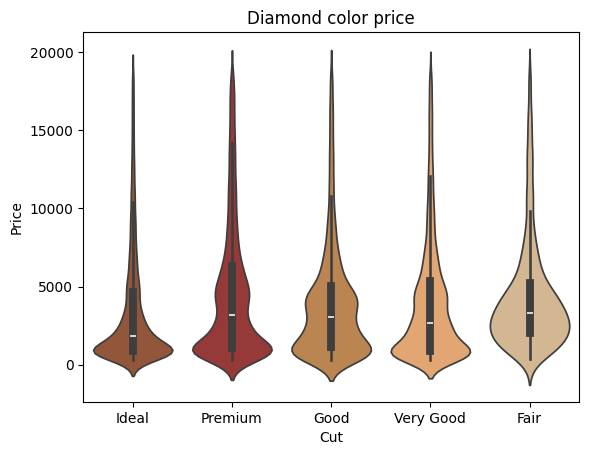

In [9]:
# plt.figure(figsize=(10,8))
cols = ['#A0522D','#A52A2A','#CD853F','#F4A460','#DEB887']
ax = sb.violinplot(x='cut',y = 'price',data = data,palette=cols)
ax.set_title('Diamond color price')
ax.set_xlabel('Cut')
ax.set_ylabel('Price')
plt.show()

C:\Users\maith\AppData\Local\Temp\ipykernel_12484\464163320.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.violinplot(x='color',y = 'price',data = data,palette=cols)
C:\Users\maith\AppData\Local\Temp\ipykernel_12484\464163320.py:1: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  ax = sb.violinplot(x='color',y = 'price',data = data,palette=cols)


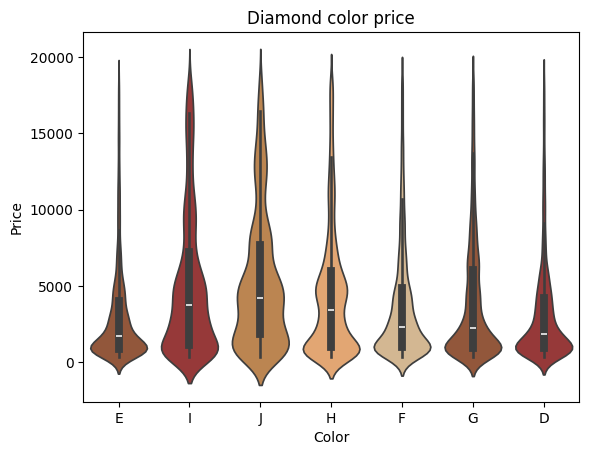

In [10]:
ax = sb.violinplot(x='color',y = 'price',data = data,palette=cols)
ax.set_title('Diamond color price')
ax.set_xlabel('Color')
ax.set_ylabel('Price')
plt.show()

In [11]:
# descriptive statistics
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


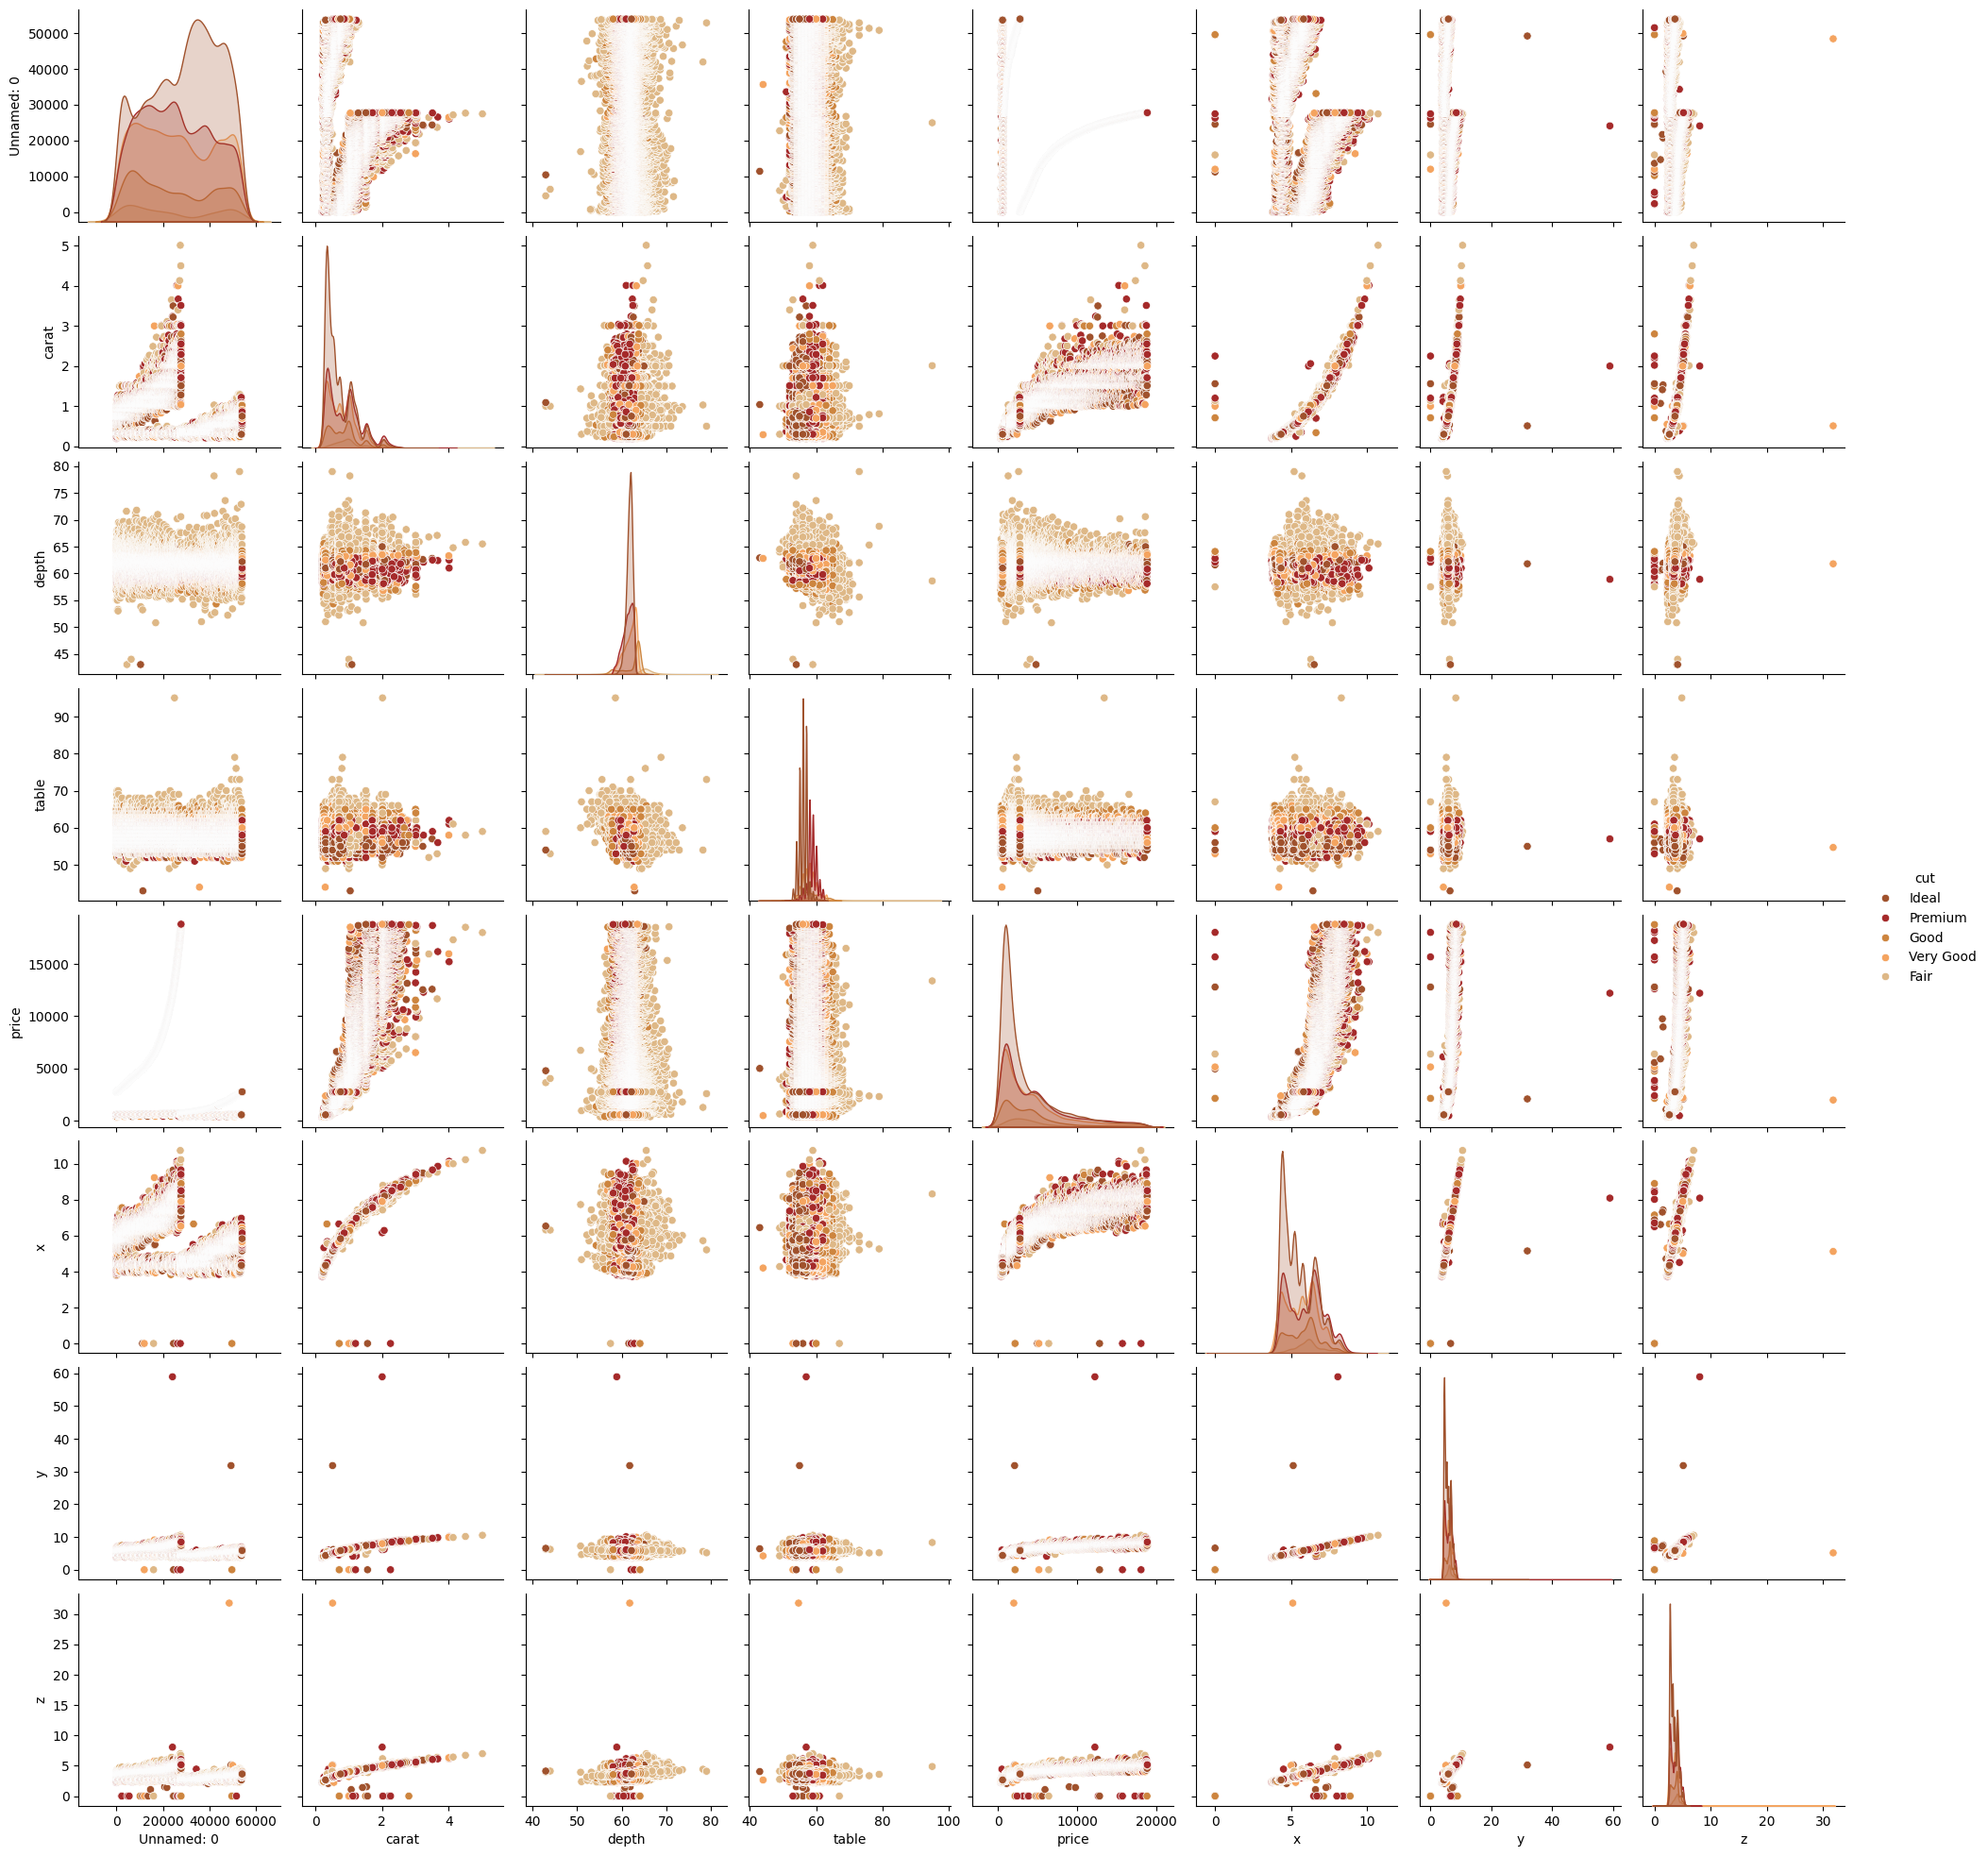

In [12]:
ax = sb.pairplot(data,hue = 'cut',palette=cols)

Text(0.5, 1.0, 'line plot on Price vs y')

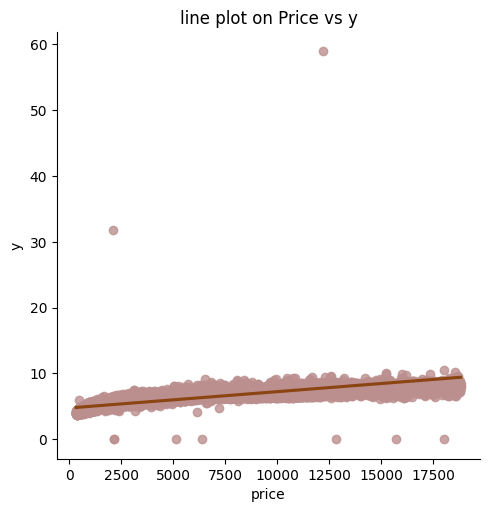

In [13]:
# checking for potential outliers 
lm = sb.lmplot(x = 'price',y = 'y',data = data,scatter_kws={'color':'#bc8f8f'},line_kws={'color':'#8b4513'})
plt.title('line plot on Price vs y')

Text(0.5, 1.0, 'line plot on Price vs z')

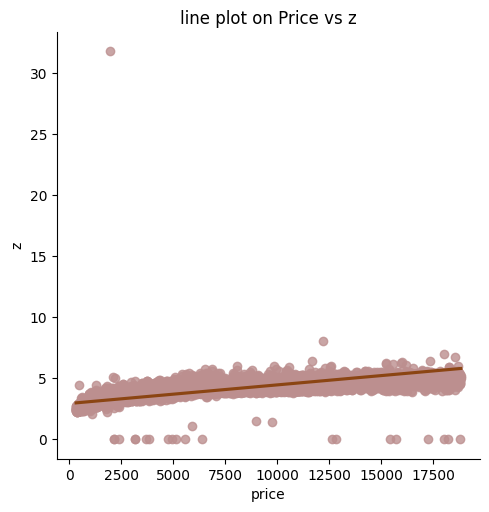

In [14]:
lm = sb.lmplot(x = 'price',y = 'z',data = data,scatter_kws={'color':'#bc8f8f'},line_kws={'color':'#8b4513'})
plt.title('line plot on Price vs z')

Text(0.5, 1.0, 'line plot on Price vs depth')

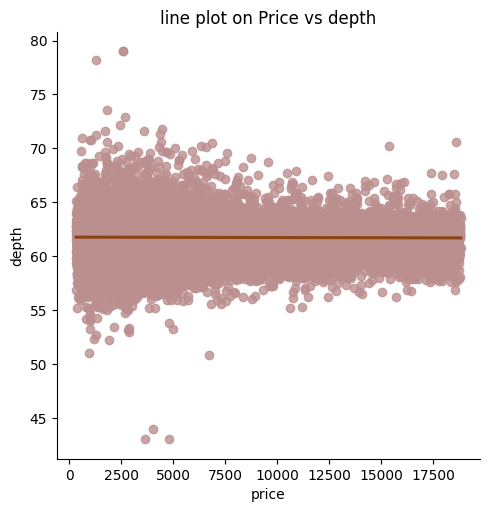

In [15]:
lm = sb.lmplot(x = 'price',y = 'depth',data = data,scatter_kws={'color':'#bc8f8f'},line_kws={'color':'#8b4513'})
plt.title('line plot on Price vs depth')

Text(0.5, 1.0, 'line plot on Price vs table')

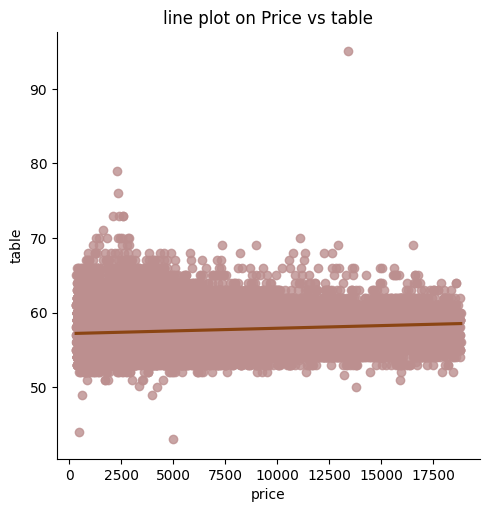

In [16]:
lm = sb.lmplot(x = 'price',y = 'table',data = data,scatter_kws={'color':'#bc8f8f'},line_kws={'color':'#8b4513'})
plt.title('line plot on Price vs table')

In [38]:
#data cleaning 
data = data.drop('Unnamed: 0',axis=1)
data.sample(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
1887,0.71,Very Good,F,SI2,61.4,56.0,3075,5.71,5.73,3.51


In [39]:
data = data.drop(data[data['x'] == 0].index)
data = data.drop(data[data['y'] == 0].index)
data = data.drop(data[data['z'] == 0].index)
data.shape
data.sample(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
42220,0.42,Ideal,G,IF,62.2,54.0,1289,4.81,4.84,3.0


In [40]:
data = data[(data['depth'] < 75)&(data['depth']>45)]
data = data[(data['table'] < 80) &(data['table']>40)]
data = data[data['y'] < 40]
data = data[data['x'] < 40]
data = data[(data['z']<40)&(data['z'] >2)]
data.shape

(53909, 10)

In [42]:
# encoding categorical variables
dataNew = data.copy()

columns = ['cut','color','clarity']
labelEncoding = LabelEncoder()
for col in columns:
    dataNew[col] = labelEncoding.fit_transform(dataNew[col])
dataNew.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000
mean,0.797617,2.553396,2.593964,3.835575,61.749743,57.455852,3930.513680,5.731441,5.733764,3.539994
std,0.473759,1.027444,1.701283,1.724540,1.420093,2.226169,3987.145802,1.119369,1.116891,0.702085
min,0.200000,0.000000,0.000000,0.000000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,73.600000,79.000000,18823.000000,10.740000,31.800000,31.800000
